# Preprocessing

Attempt at reading the data and just preprocessing and understanding the data.

In [125]:
# All imports
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (15, 5)

### Read the dataframe

In [4]:
df = pd.read_csv('./public.csv.gz')

In [21]:
# rename the index columns
df = df.rename(columns={'Unnamed: 0': 'IDX'})
# find other descriptive statistics
n_col = len(df.columns)
n_row = len(df.index)
print(f'dataset: rows={n_row} and columns={n_col}')

dataset: rows=4533711 and columns=84


In [22]:
print(f'column names: {df.columns}')

column names: Index(['IDX', 'AG_PPM', 'AL_PPM', 'AL2O3_PPM', 'AS_PPM', 'AU_PPM', 'B_PPM',
       'BA_PPM', 'BE_PPM', 'BI_PPM', 'BR_PPM', 'C_PPM', 'CA_PPM', 'CAO_PPM',
       'CD_PPM', 'CE_PPM', 'CO_PPM', 'CR_PPM', 'CS_PPM', 'CU_PPM', 'DY_PPM',
       'ER_PPM', 'EU_PPM', 'F_PPM', 'FE_PPM', 'FE2O3_PPM', 'GA_PPM', 'GD_PPM',
       'GE_PPM', 'HF_PPM', 'HG_PPM', 'HO_PPM', 'I_PPM', 'IN_PPM', 'IR_PPM',
       'K_PPM', 'K2O_PPM', 'LA_PPM', 'LI_PPM', 'LU_PPM', 'MG_PPM', 'MGO_PPM',
       'MN_PPM', 'MNO_PPM', 'MO_PPM', 'NA_PPM', 'NA2O_PPM', 'NB_PPM', 'ND_PPM',
       'NI_PPM', 'P_PPM', 'P2O5_PPM', 'PB_PPM', 'PD_PPM', 'PR_PPM', 'PT_PPM',
       'RB_PPM', 'RE_PPM', 'RH_PPM', 'RU_PPM', 'S_PPM', 'SB_PPM', 'SC_PPM',
       'SE_PPM', 'SI_PPM', 'SIO2_PPM', 'SM_PPM', 'SN_PPM', 'SR_PPM', 'TA_PPM',
       'TB_PPM', 'TE_PPM', 'TH_PPM', 'TI_PPM', 'TIO2_PPM', 'TL_PPM', 'TM_PPM',
       'U_PPM', 'V_PPM', 'W_PPM', 'Y_PPM', 'YB_PPM', 'ZR_PPM', 'ZN_PPM'],
      dtype='object')


In [37]:
print('Column number of None:')
for col in df.columns:
    print(
        f'{col: <12}: {np.sum(pd.isna(df[col])): <10} | {np.sum(pd.isnull(df[col])): <10}: {np.sum(pd.isna(df[col])) / n_row}')

Column number of None:
IDX         : 0          | 0         : 0.0
AG_PPM      : 2373593    | 2373593   : 0.5235430754187905
AL_PPM      : 2770304    | 2770304   : 0.6110455651010839
AL2O3_PPM   : 4435429    | 4435429   : 0.9783219530314129
AS_PPM      : 1308714    | 1308714   : 0.2886628636011426
AU_PPM      : 1599001    | 1599001   : 0.3526914265157175
B_PPM       : 4472709    | 4472709   : 0.9865447974076865
BA_PPM      : 3206920    | 3206920   : 0.7073498950418322
BE_PPM      : 3929712    | 3929712   : 0.8667760252031945
BI_PPM      : 3030852    | 3030852   : 0.6685146009527294
BR_PPM      : 4532682    | 4532682   : 0.9997730336141849
C_PPM       : 4504094    | 4504094   : 0.9934673824599759
CA_PPM      : 2864610    | 2864610   : 0.6318466263067937
CAO_PPM     : 4437369    | 4437369   : 0.9787498585595773
CD_PPM      : 3598429    | 3598429   : 0.7937049803130372
CE_PPM      : 3824587    | 3824587   : 0.8435886186834582
CO_PPM      : 1522860    | 1522860   : 0.33589701681470213
CR_PP

In [53]:
# transform the dataset
df_zn = pd.DataFrame(data={'IDX': df.IDX, 'ZN_PPM': df.ZN_PPM})

In [59]:
df_zn_sorted = df_zn.sort_values('ZN_PPM', axis=0, ascending=True)

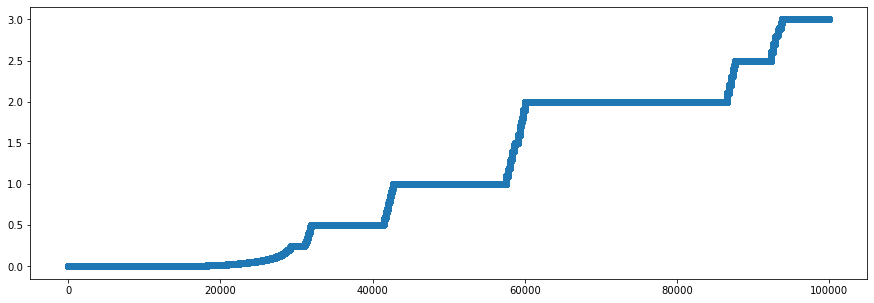

In [66]:
nsample = 100000
plt.scatter(range(nsample), df_zn_sorted.ZN_PPM[:nsample])
plt.show()

# Multiple Linear Regression

$$y = \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p$$

where $p$ denotes number of features and $j \in [0, p]$.
also $n$ denotes the number of observations and $i \in [1, n]$.

### Optimisation

Using two methods:
1. Gradient Descent
2. Normal Equation

#### Normal Equation
$$ \beta = (X^T X)^{-1} X^T Y $$

### Split Data

In [177]:
# define the split data function

def split_data(X, Y, ratio: float):
    """
    split_data splits the data based on the ratio given.
    """
    # get indices to be able to shuffle the data
    indices = np.array(range(len(X)))
    random.shuffle(indices)

    left_size = round(ratio * len(X))
    left_indices = indices[0:left_size]
    right_indices = indices[left_size:len(X)]

    X_left = X[left_indices]
    X_right = X[right_indices]
    Y_left = Y[left_indices]
    Y_right = Y[right_indices]

    return X_left, Y_left, X_right, Y_right

In [197]:
def normal_equation(X_, Y_):
    """
    normal_equation calculates the vector beta.
    """
    u, s, vh = np.linalg.svd(np.dot(X_.T, X_), full_matrices=True)

    beta = np.dot(np.dot(u, X_.T), Y_)
    return beta


def predict(X_, b):
    """
    predict the value for a given input matrix X.
    """
    return np.dot(X_, b)


def metrics(Y_hat_, Y_):
    """
    metrics calculates the metrics between the predicted values Y-hat and Y.
    """
    MAE = np.mean(np.abs(Y_hat_ - Y_))
    MSE = np.square(Y_ - Y_hat_).mean()

    print(f'MAE: {MAE} MSE: {MSE}')

#### Example

Apply the multiple linear regression on the dataset.

In [198]:
# set a smaller limited sample size
n = 1000000

# get the X dataset
X = df[:n][df.columns[2:-1]]
X = X.fillna(-1)
# get the expected output
Y = df[:n][df.columns[-1]]

In [199]:
# Add a column of ones for the bias parameter
one = np.ones((len(X), 1))
X = np.append(one, X, axis=1)

# reshape Y to a column vector
Y = np.array(Y).reshape((len(Y), 1))

In [200]:
split = 0.7
X_train, Y_train, X_test, Y_test = split_data(X, Y, ratio=split)

In [201]:
print('Training Set:')
print(f'X train shape: {X_train.shape}')
print(f'Y train shape: {Y_train.shape}')
print('Test Set:')
print(f'X test shape: {X_test.shape}')
print(f'Y test shape: {Y_test.shape}')

Training Set:
X train shape: (700000, 82)
Y train shape: (700000, 1)
Test Set:
X test shape: (300000, 82)
Y test shape: (300000, 1)


In [202]:
# calculate beta
beta = normal_equation(X_train, Y_train)

In [203]:
# calculate train predictions
Y_train_hat = predict(X_train, beta)

In [205]:
# calculate metrics
metrics(Y_train_hat, Y_train)

MAE: 6.51419154500685e+17 MSE: 2.5405338923535083e+36


# Kernel Smoothing Methods
## Gaussian Kernel Smoothing

$$ K = exp\left( -\gamma | x_1 - x_2 |^2 \right) $$

In [209]:
def kernel(x1, x2, gamma):
    """kernel calculates the kernel"""
    return np.exp(-gamma * np.square(np.abs(x1 - x2)))

In [214]:
def kernel_matrix(x, gamma):
    """
    kernel_matrix calculates the kernel matrix between
    all combinations of x_i and x_j.
    """
    n = len(x)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel(x[i], x[j], gamma)
    return K

In [222]:
def solve_a(K, y, la):
    """
    solves for the matrix A.
    :param K: denotes the kernel matrix
    :param y: denotes output y
    :param la: denotes lambda
    :return:
    """
    I = np.diag(np.ones(len(K)))
    u, s, v = np.linalg.svd(np.dot(K + (la * I), y))
    # A = np.linalg.inv(np.dot(K + (la * I), y))
    return u

In [223]:
def fhat(xnew, A, x, gamma):
    n = len(xnew)
    m = len(x)
    v = np.zeros(n)
    for j in range(n):
        for i in range(m):
            v[j] = v[j] + A[i] * kernel(xnew[j], x[i], gamma)
    return v

### Example

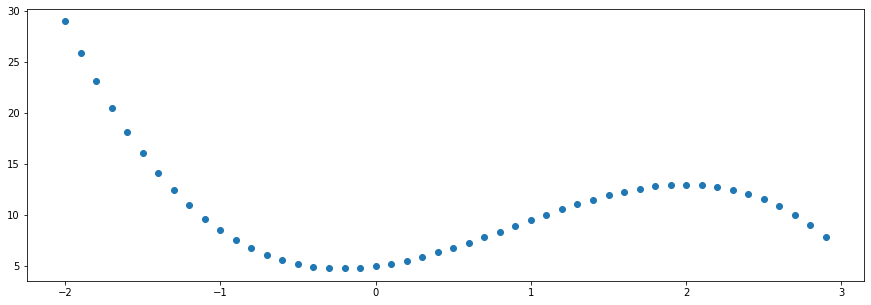

In [224]:
x_series = np.array(range(-20, 30, 1)) / 10


def f(x):
    return 5 + 2 * x + 4 * np.power(x, 2) - 1.5 * np.power(x, 3)

y_series = f(x_series)
plt.scatter(x_series, y_series)
plt.show()

In [226]:
gam = 10 # gamma
la = 1 # lambda
K = kernel_matrix(x_series, gam)
A = solve_a(K, y_series, la)
# yhat = fhat(x_series, A, x_series, gam)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [227]:
h = np.array([1, 2, 3])
3 * h

array([3, 6, 9])